<a href="https://colab.research.google.com/github/Eddy09246/500-richest-businessmen-in-the-world/blob/main/500_richest_businessmen_in_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read Data

In [ ]:
data = pd.read_csv('toprich2024.csv',names=['Name','Total_net_worth_in_USD','Last_change_in_USD','YTD_change_in_USD','Country/Region','Industry'],header=0)

# Data Exploration

In [ ]:
data.shape

(500, 6)

In [ ]:
data.columns

Index(['Name', 'Total_net_worth_in_USD', 'Last_change_in_USD',
       'YTD_change_in_USD', 'Country/Region', 'Industry'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    500 non-null    object
 1   Total_net_worth_in_USD  500 non-null    object
 2   Last_change_in_USD      500 non-null    object
 3   YTD_change_in_USD       500 non-null    object
 4   Country/Region          500 non-null    object
 5   Industry                500 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [ ]:
data.head(5)

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer


In [ ]:
data.tail()

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
496,Igor Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
497,Dmitry Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
498,Renate Reimann-Haas,$6.38B,$0,+$2.35B,Austria,Retail
499,Matthias Reimann-Andersen,$6.38B,$0,+$2.35B,Austria,Retail
500,Stefan Reimann-Andersen,$6.38B,$0,+$2.35B,Austria,Retail


In [ ]:
data.sample(5)

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
73,Lei Jun,$26.5B,-$391M,+$12.1B,China,Technology
162,Li Xiting,$14.5B,-$78.3M,-$1.08B,Singapore,Health Care
23,Changpeng Zhao,$63.2B,+$3.70B,+$28.9B,Canada,Finance
134,Mike Cannon-Brookes,$16.3B,+$417M,+$2.06B,Australia,Technology
354,Alexander Abramov,$8.31B,-$25.0M,+$873M,Russian Federation,Industrial


# Data Cleaning and Manipulation

In [ ]:
data.isnull().sum()

,0
Name,0
Total_net_worth_in_USD,0
Last_change_in_USD,0
YTD_change_in_USD,0
Country/Region,0
Industry,0


Clean and Convert Columns <code> Total_net_worth_in_USD</code>, <code> Last_change_in_USD	</code>, <code>YTD_change_in_USD</code> to billions

In [ ]:
def clean_data(row):
    row = row.replace('$','').replace(',','').replace('B','')
    if 'M' in row:
        return float(row.replace('M',''))/1000
    elif 'k' in row:
        return float(row.replace('k',''))/1000000
    else:
        return float(row)

columns_to_clean = ['Total_net_worth_in_USD','Last_change_in_USD','YTD_change_in_USD']
for column in columns_to_clean:
    data[column] = data[column].apply(clean_data)

In [ ]:
data.sample(10)

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
460,Mark Scheinberg,6.83,-0.0500,1.000,Isle of Man,Entertainment
89,Reinhold Wuerth,22.80,-0.0565,-2.980,Germany,Industrial
142,Thomas Struengmann,15.80,0.1000,2.860,Germany,Health Care
342,Rahul Bhatia,8.61,-0.0180,2.240,India,Consumer
408,Todd Boehly,7.46,0.0251,0.647,United States,Diversified
351,Chip Wilson,8.35,0.0102,-0.462,Canada,Retail
456,Ruan Liping,6.86,0.0736,0.902,China,Industrial
28,Ma Huateng,48.00,-0.2470,13.300,China,Technology
423,Cho Jung-Ho,7.26,0.0658,2.520,"Korea, Republic of",Finance
184,Brian Armstrong,13.50,0.4560,6.350,United States,Technology


Maximum <code> Total_net_worth_in_USD</code>

In [ ]:
data[data.Total_net_worth_in_USD==data.Total_net_worth_in_USD.max()]

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
1,Elon Musk,447.0,62.8,218.0,United States,Technology


Minimum <code> Total_net_worth_in_USD</code>

In [ ]:
data[data.Total_net_worth_in_USD==data.Total_net_worth_in_USD.min()]

,Name,Total_net_worth_in_USD,Last_change_in_USD,YTD_change_in_USD,Country/Region,Industry
498,Renate Reimann-Haas,6.38,0.0,2.35,Austria,Retail
499,Matthias Reimann-Andersen,6.38,0.0,2.35,Austria,Retail
500,Stefan Reimann-Andersen,6.38,0.0,2.35,Austria,Retail


Number of unigue <code>Country/Region</code>




In [ ]:
data['Country/Region'].nunique()

48

Number of unigue <code> Industry</code>

In [ ]:
data['Industry'].nunique()

14

Individuals with the highest YTD change in net worth

In [188]:
top_performers_ytd = data.nlargest(10, 'YTD_change_in_USD')
print("\nTop 10 Performers by YTD Change:")
top_performers_ytd[['Name', 'YTD_change_in_USD', 'Country/Region', 'Industry']]


Top 10 Performers by YTD Change:


,Name,YTD_change_in_USD,Country/Region,Industry
1,Elon Musk,218.0,United States,Technology
3,Mark Zuckerberg,95.5,United States,Technology
11,Jensen Huang,77.7,United States,Technology
4,Larry Ellison,75.3,United States,Technology
2,Jeff Bezos,72.1,United States,Technology
6,Larry Page,47.1,United States,Technology
12,Jim Walton,44.6,United States,Retail
15,Alice Walton,43.9,United States,Retail
14,Rob Walton,43.4,United States,Retail
8,Sergey Brin,43.2,United States,Technology


# Data Visualisation

distribution of billionaires across different <code>industries</code>

In [ ]:
industry_count = data['Industry'].value_counts()

fig = px.pie(labels=industry_count.index, values=industry_count.values, title=" billionaires across different industries", names=industry_count.index,hole=0.2)
fig.update_traces(textposition='outside', textinfo='percent+label+value')
fig.show()

Top 20 countries with the most billionaires.

In [117]:
country_count = data['Country/Region'].value_counts().head(20)
country_count.sort_values(ascending=True,inplace=True)

bar = px.bar(x = country_count.values,
                 y = country_count.index,
                 orientation='h',
                 color=country_count.values,
                 color_continuous_scale=px.colors.sequential.Blugrn,
                 title='Top 20 Countries/Regions by number of billionaires',
                 labels={'x':'count','y':'country'})


bar.update_layout(xaxis_title='Number of billionaires',
                      yaxis_title='Region',
                      coloraxis_showscale=True)
bar.update_traces(texttemplate='%{x}', textposition='outside')

bar.show()

Number of billionaires by Country using World Map

In [149]:
df_countries = data.groupby('Country/Region').agg({'Country/Region':'count'})
df_countries.rename(columns={'Country/Region':'Number of billionaires'},inplace=True)
df_countries.reset_index(inplace=True)
df_countries.sort_values(by='Number of billionaires',ascending=False,inplace=True)
df_countries

,Country/Region,Number of billionaires
47,United States,191
7,China,55
18,India,26
36,Russian Federation,25
15,Germany,19
46,United Kingdom,15
17,Hong Kong,14
4,Canada,13
13,France,12
1,Australia,11


In [152]:
import pycountry

def country_to_iso(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return "Unknown"

df_countries['ISO_Code'] = df_countries['Country/Region'].apply(country_to_iso)


In [154]:
df_countries[df_countries['ISO_Code']=='Unknown']

,Country/Region,Number of billionaires,ISO_Code


In [168]:
world_map = px.choropleth(df_countries,
                          locations='ISO_Code',
                          color='Number of billionaires',
                          hover_name='Country/Region',
                          title='Number of billionaires by Country',
                          # projection='natural earth',
                          color_continuous_scale=px.colors.sequential.algae)

world_map.update_layout(coloraxis_showscale=True,)
world_map.update_traces()
world_map.show()

Total Net Worth and YTD Change by Industry

In [126]:
total_net_and__ytd_change = data.groupby('Industry',as_index=False).agg({'Total_net_worth_in_USD':'sum', 'YTD_change_in_USD':'sum'})
total_net_and__ytd_change.sort_values(by='Total_net_worth_in_USD',ascending=False,inplace=True)
total_net_and__ytd_change

,Industry,Total_net_worth_in_USD,YTD_change_in_USD
13,Technology,3142.06,962.9400
8,Industrial,970.58,104.3920
5,Finance,945.16,213.0547
11,Retail,917.68,219.9421
2,Diversified,908.43,65.6660
1,Consumer,819.12,-3.2360
3,Energy,495.92,46.9570
6,Food & Beverage,378.54,5.6490
7,Health Care,344.13,44.3566
10,Real Estate,306.78,31.7550


In [127]:
fig = px.bar(total_net_and__ytd_change, x="Industry", y=["Total_net_worth_in_USD", "YTD_change_in_USD"], barmode="group",
             title="Total Net Worth and YTD Change by Industry")

fig.for_each_trace(lambda t: t.update(name=t.name.replace('Total_net_worth_in_USD', 'Total Net Worth').replace('YTD_change_in_USD', 'YTD Change')))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis_title='Industry', yaxis_title='Amount in Billions(USD)')

fig.show()


In [174]:
df = data.groupby(['Country/Region', 'Industry'], as_index=False).agg({'Total_net_worth_in_USD': 'sum', 'YTD_change_in_USD': 'sum'})
df.sort_values(by='Total_net_worth_in_USD', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Country/Region,Industry,Total_net_worth_in_USD,YTD_change_in_USD
0,United States,Technology,2443.36,818.7180
1,United States,Finance,646.21,145.2727
2,United States,Retail,520.60,181.0328
3,France,Consumer,369.60,-67.2000
4,China,Technology,288.76,33.4030
...,...,...,...,...
156,France,Health Care,6.67,-0.0857
157,Greece,Industrial,6.61,0.9230
158,Brazil,Health Care,6.56,-1.1700
159,Norway,Food & Beverage,6.47,1.0600


Total Net Worth by Country and Industry

In [182]:
burst = px.sunburst(df,
                    path=['Country/Region', 'Industry'],
                    values='Total_net_worth_in_USD',
                    color='YTD_change_in_USD',
                    color_continuous_scale=px.colors.sequential.Blugrn,
                    title='Sunburst Chart of Total Net Worth by Country and Industry',
                   )

burst.update_layout(xaxis_title='Number of Prizes',

                    coloraxis_showscale=False)

Total Net Worth and YTD Change

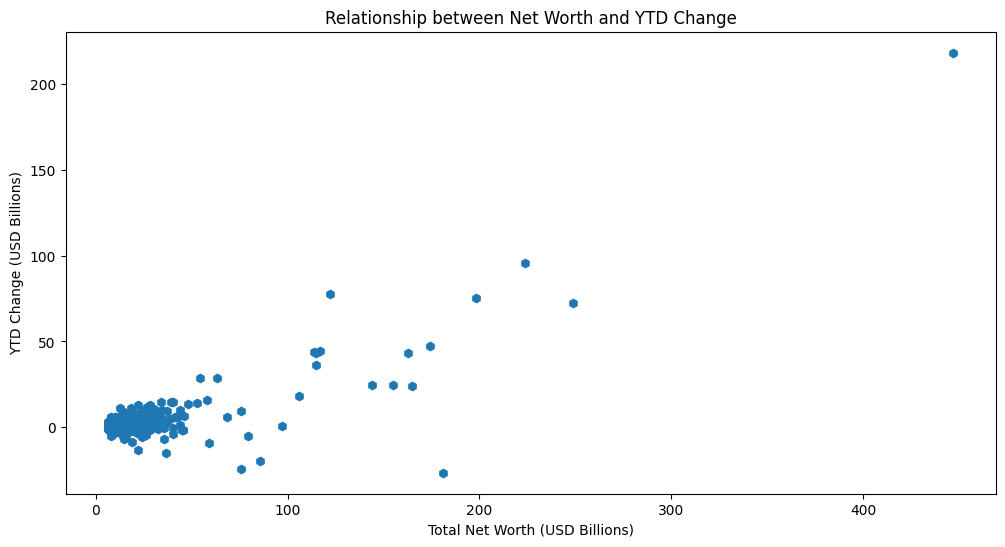

In [194]:
plt.figure(figsize=(12, 6))
plt.scatter(x='Total_net_worth_in_USD', y='YTD_change_in_USD', data=data,marker='h')
plt.title('Relationship between Net Worth and YTD Change')
plt.xlabel('Total Net Worth (USD Billions)')
plt.ylabel('YTD Change (USD Billions)')
plt.show()

 Matrix of Financial Metrics

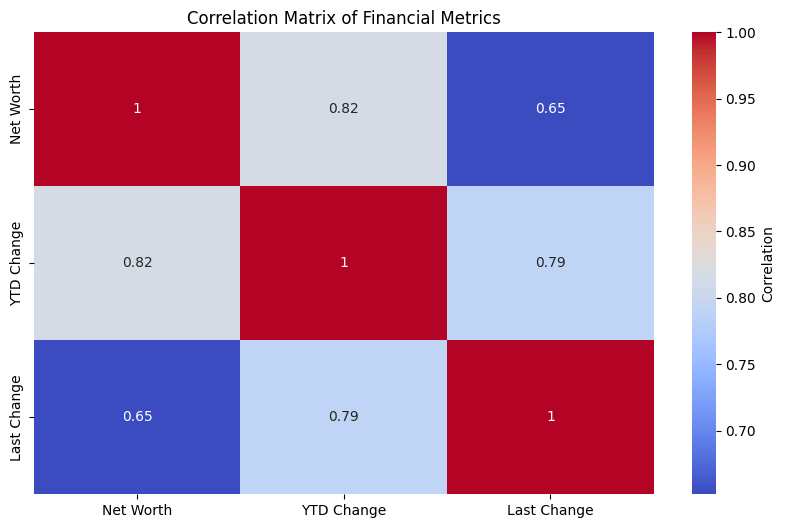

In [199]:
correlation_matrix = data[['Total_net_worth_in_USD', 'YTD_change_in_USD', 'Last_change_in_USD']].corr()
new_column_names = {'Total_net_worth_in_USD': 'Net Worth',
                    'YTD_change_in_USD': 'YTD Change',
                    'Last_change_in_USD': 'Last Change'}
correlation_matrix = correlation_matrix.rename(columns=new_column_names)
correlation_matrix = correlation_matrix.rename(index=new_column_names)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

Word Cloud of Industries

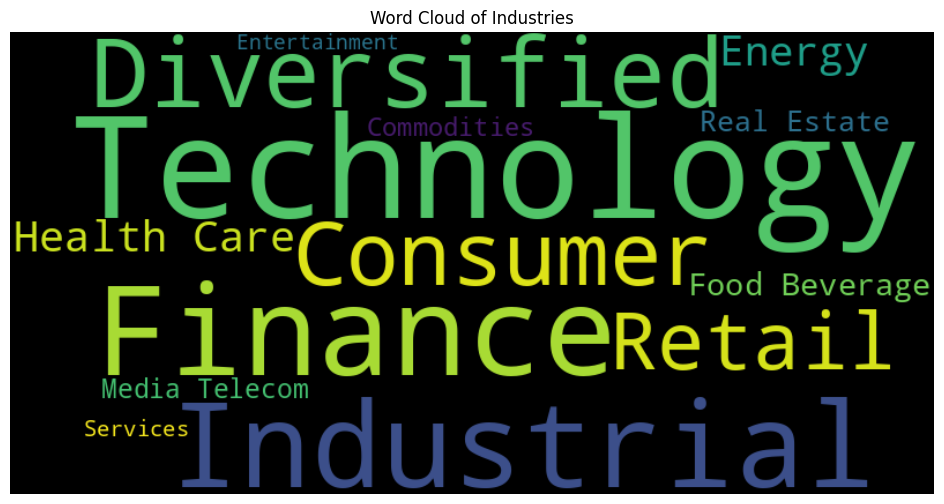

In [211]:
from wordcloud import WordCloud

text = " ".join(data['Industry'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="black",stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Industries")
plt.show()